In [49]:
# 런타임 > GPU
# 런타임 > 런타임 유형 변경 > 하드웨어 가속기 (None) > GPU > 저장 > 연결
# Keras - Tensorflow 고수준 API - 많은게 이미 정해진 대신 커스터마이징이 어렵다
from keras.models import Sequential # 순전파 모델 클래스
from keras.layers import Dense # 층을 쌓아주는 클래스 (model.add...)

In [50]:
# Sequential 모델
model = Sequential()

In [51]:
# 입력층 3이고 -> 은닉층이 2인 레이어 추가
model.add(Dense(input_shape=(3,), units=2, activation='sigmoid')) # 활성함수 sigmoid
# 출력층 추가
model.add(Dense(1))

In [52]:
# Layer 정보
model.summary() # 입력층 dense는 별도로 표기 X
# Param - 연결된 노드의 줄 갯수 + 노드 자체의 수

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [53]:
from keras.optimizers.optimizer_v2.optimizer_v2 import optimizer_utils
# 모델 학습 -> epoch, 최적화, 손실 함수(loss)
from keras import optimizers
# 최적화 함수
sgd = optimizers.SGD()
# 손실 함수 설정
model.compile(loss='mse', optimizer=sgd) # 회귀, 연속된 값
# 분류 문제에 대한 손실 함수
model.compile(loss='categorical_crossentropy', optimizer=sgd,
              metrics=['accuracy']) # 회귀, 연속된 값

In [54]:
# IMDB - 왓챠피디아? 영화 리뷰 데이터셋 -> ( BOW ) => (1, 0)
from keras.datasets import imdb

In [55]:
# IMDB 데이터 로드
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000 # 가장 자주 나타나는 1만개 단어만 사용
)

In [56]:
print(train_data[0]) # BOW

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [57]:
print(train_labels) # 1, 0

[1 0 0 ... 0 1 0]


In [58]:
max([max(sequence) for sequence in train_data])

9999

In [59]:
# 리스트 데이터 딥러닝 X -> 텐서
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    # [1, 14, 22, 16, 43, 530 ....]
    # [[0, 1, 0, 0, 0 ....], [0000000...1],]
    results = np.zeros((len(sequences), dimension)) # [[]] <- 1, 문장에 있는 단어수 / 2. 고유 단어수 (BOW)
    for i, seq in enumerate(sequences):
        results[i, seq] = 1,
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [60]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [61]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [62]:
# 모델 설계
from keras import models
from keras import layers

model = models.Sequential()
# 입력층 10000개 / 은닉층 16층 / 활성화 Relu
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu')) # relu -> 음수 0
# 출력층 1 / 확률 (0~1) sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                160016    
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [64]:
# 검증셋
x_val = x_train[:10000]
p_x_train = x_train[10000:]
y_val = y_train[:10000]
p_y_train = y_train[10000:]

In [65]:
# 손실함수, 최적화함수
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(
    p_x_train, p_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5111 - acc: 0.7793 - val_loss: 0.3895 - val_acc: 0.8583
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3050 - acc: 0.9003 - val_loss: 0.3109 - val_acc: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2247 - acc: 0.9249 - val_loss: 0.3046 - val_acc: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1746 - acc: 0.9441 - val_loss: 0.2755 - val_acc: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1448 - acc: 0.9525 - val_loss: 0.2802 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1175 - acc: 0.9633 - val_loss: 0.2955 - val_acc: 0.8830
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0978 - acc: 0.9707 - val_loss: 0.3509 - val_acc: 0.8698
Epoch 8/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0811 - a

In [66]:
results # loss / accuracy

[0.7543497681617737, 0.8519600033760071]

In [67]:
(model.predict(x_test) >= 0.5).astype('float32')

782/782 [==============================] - 2s 2ms/step


array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [68]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

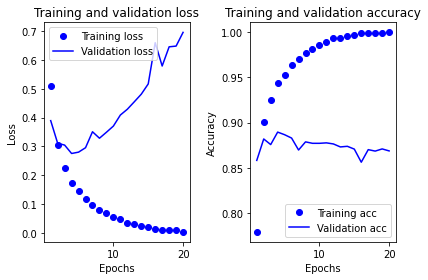

In [69]:
# 훈련과 검증 데이터에 대한 손실 시각화
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# 훈련과 검증 데이터에 대한 정확도 시각화
plt.subplot(1, 2, 2)
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
# 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가
# 검증 손실과 정확도는 일치하지 않음 -> 오버피팅

In [70]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model2.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 21ms/step - loss: 0.4410 - acc: 0.8241
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2548 - acc: 0.9101
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1972 - acc: 0.9293
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3024 - acc: 0.8798


In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# 훈련과 검증 데이터에 대한 정확도 시각화
plt.subplot(1, 2, 2)
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()